In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [77]:
dataset.shape


(2919, 12)

In [81]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


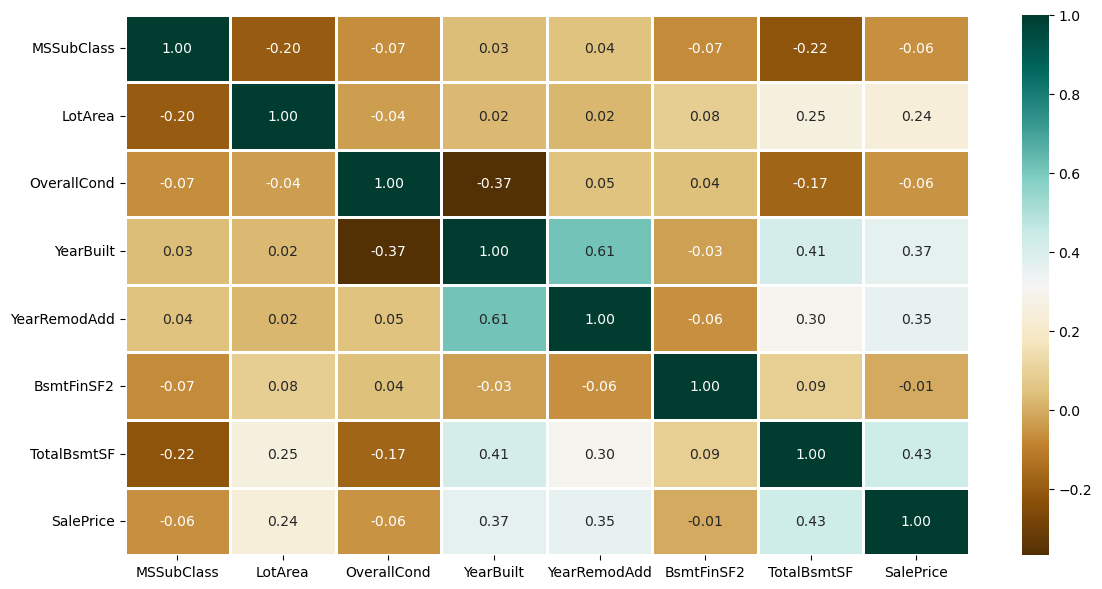

In [91]:
numeric_cols = dataset.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_cols.corr()

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix,
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

plt.tight_layout()  # Adjusts the layout to ensure nothing overlaps
plt.show()          # Displays the plot

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

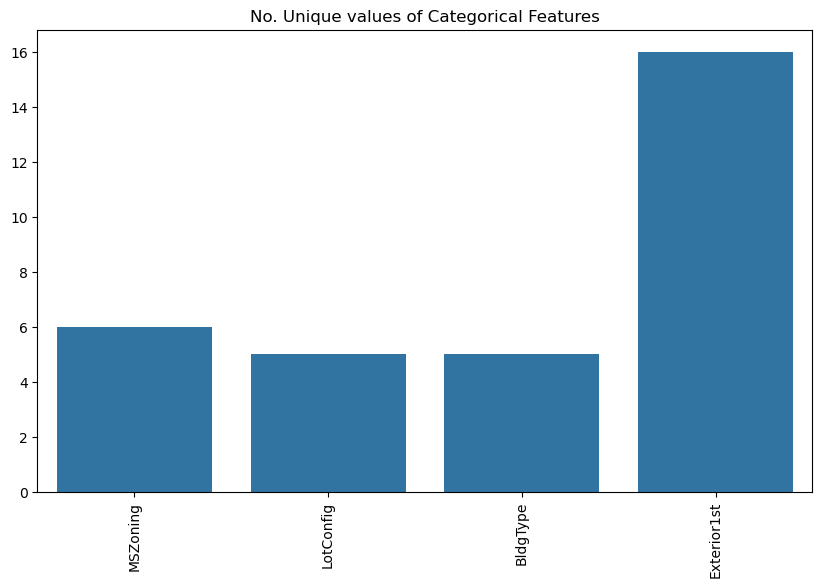

In [93]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


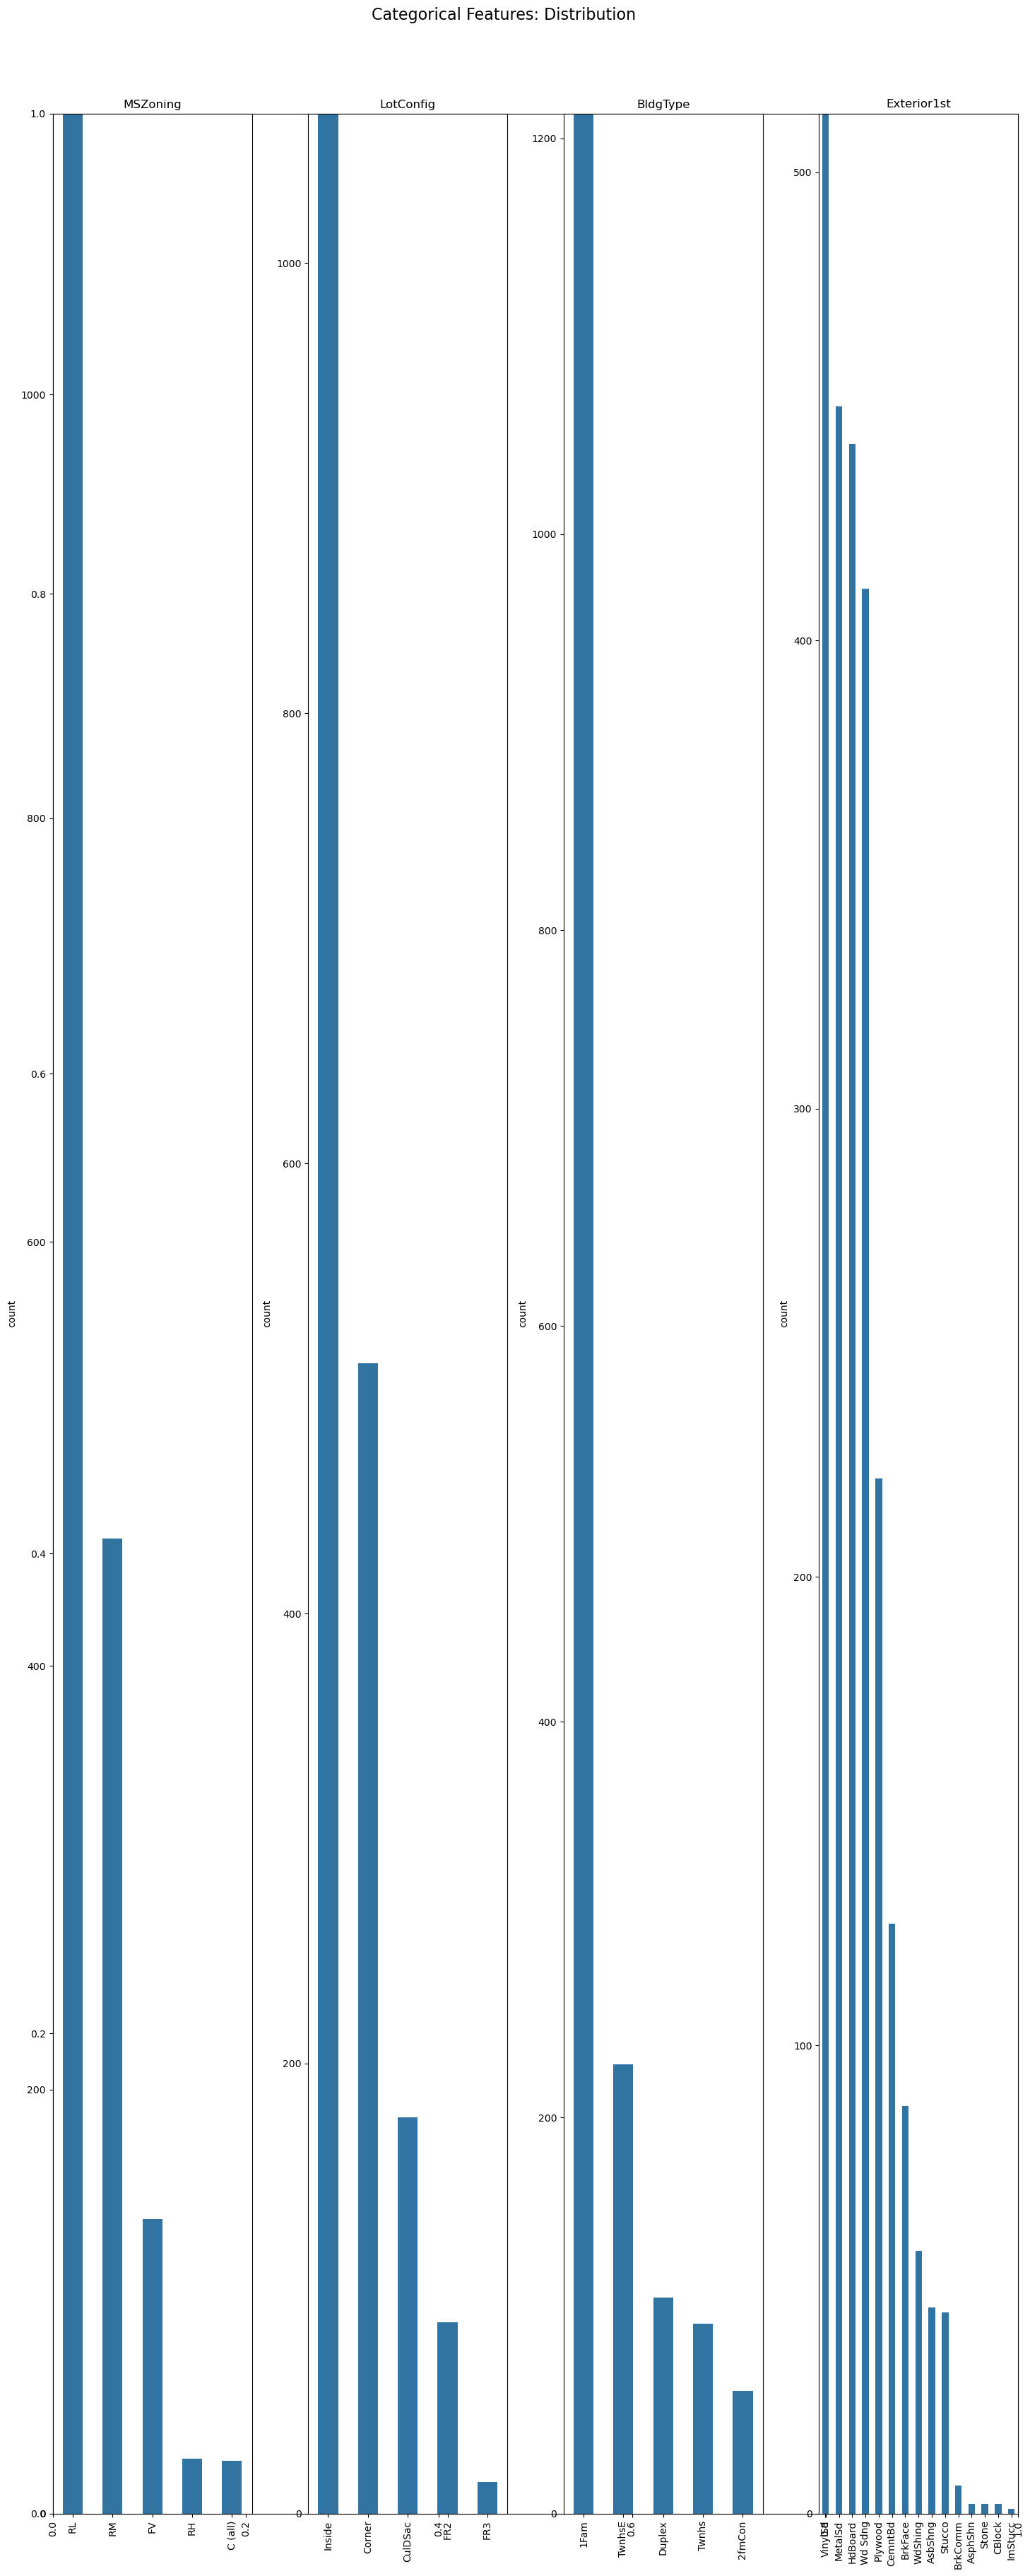

In [99]:


# Define the figure size dynamically based on the number of subplots
plt.figure(figsize=(15, 36))
plt.suptitle('Categorical Features: Distribution', y=1.02, fontsize=16)
plt.xticks(rotation=90)

# Adjust the grid size according to the number of categorical columns
num_cols = len(object_cols)
grid_rows = (num_cols + 3) // 4  # 4 subplots per row

index = 1
for col in object_cols:
    plt.subplot(grid_rows, 4, index)
    y = dataset[col].value_counts()
    sns.barplot(x=list(y.index), y=y, width=0.5)
    
    # Set y-axis limit to a percentage of the maximum count (e.g., 50%)
    max_count = y.max()
    plt.ylim(0, max_count * 0.5)  # Adjust the 0.5 value to fit your needs
    
    plt.xticks(rotation=90)
    plt.title(col)
    index += 1

plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = pd.read_excel("HousePricePrediction.xlsx") # Replace with your actual file path

# Handle missing values
data.ffill(inplace=True)  # Forward fill missing values

# Encode categorical variables
object_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=object_cols)  # One-Hot Encoding

# Prepare your data
X = data.drop(['SalePrice'], axis=1)
Y = data['SalePrice']

# Split the data into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Initialize and train the model
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
# Make predictions on the training and validation sets
Y_train_pred = model_LR.predict(X_train)
Y_valid_pred = model_LR.predict(X_valid)
# Calculate accuracy metrics
mae_valid = mean_absolute_error(Y_valid, Y_valid_pred)
mse_valid = mean_squared_error(Y_valid, Y_valid_pred)
r2_valid = r2_score(Y_valid, Y_valid_pred)

# Calculate bias and variance
bias = np.mean(Y_valid - Y_valid_pred)
variance = np.mean((Y_valid_pred - np.mean(Y_valid_pred)) ** 2)

print(f"Mean Absolute Error (MAE): {mae_valid}")
print(f"Mean Squared Error (MSE): {mse_valid}")
print(f"R² Score: {r2_valid}")
print(f"Bias: {bias}")
print(f"Variance: {variance}")

Mean Absolute Error (MAE): 30722.74229925672
Mean Squared Error (MSE): 1647720257.4589329
R² Score: 0.3965430632471496
Bias: -1660.147151032622
Variance: 1209141523.1540842
